## Startup Transformation Status Analisys

   Month  Revenue  Expenses
0      1  1420000    510000
1      2  1200000    532000
2      3  1050000    551000
3      4   920000    612000
4      5   807000    628000


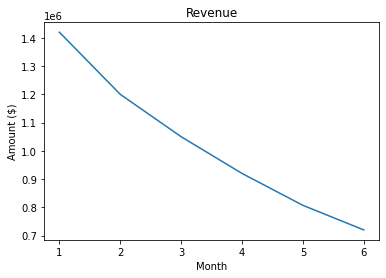

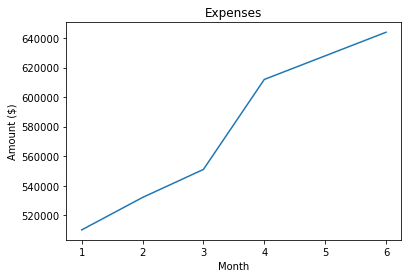

In [3]:
#Importing Libraries, loading data 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
financial_data = pd.read_csv('/Users/matteoamanti/Desktop/Github/ORACOLO23-CODECADEMY-GIT/Projects/Startup Transformation /financial_data.csv')

print(financial_data.head())

month = financial_data.Month
revenue = financial_data.Revenue
expenses = financial_data.Expenses

#Plotting revenues and expenses
plt.plot(month, revenue)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Revenue')

plt.show()

plt.plot(month, expenses)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Expenses')

plt.show()

## Expenses Analysys


In [4]:
expenses_overview = pd.read_csv('/Users/matteoamanti/Desktop/Github/ORACOLO23-CODECADEMY-GIT/Projects/Startup Transformation /expenses.csv')
expenses_overview.head(7)

,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Equipment,0.03
4,Utilities,0.03
5,Supples,0.01
6,Food,0.01


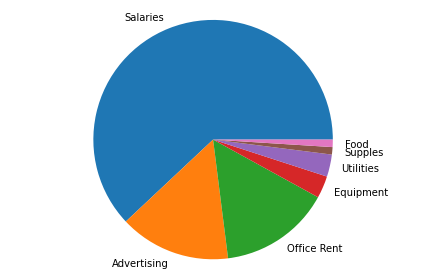

In [5]:
expenses_category = expenses_overview['Expense']
Proportion = expenses_overview['Proportion']
plt.clf()
plt.pie(Proportion, labels = expenses_category, normalize = True)
plt.axis('Equal')
plt.tight_layout()
plt.show()

In [6]:
proportions = expenses_overview.set_index('Expense')
proportions

,Proportion
Expense,
Salaries,0.62
Advertising,0.15
Office Rent,0.15
Equipment,0.03
Utilities,0.03
Supples,0.01
Food,0.01


In [7]:
#Setting a mask 'Other' for all expenses under 0,5% 

expenses_overview.Expense=expenses_overview.Expense.mask(expenses_overview.Proportion < .05, other='Other')
expenses_overview

,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Other,0.03
4,Other,0.03
5,Other,0.01
6,Other,0.01


In [8]:
expenses_category = expenses_overview['Expense']
grouped_data = expenses_overview.groupby('Expense').sum().sort_values('Proportion', ascending=False)
grouped_data

,Proportion
Expense,
Salaries,0.62
Advertising,0.15
Office Rent,0.15
Other,0.08


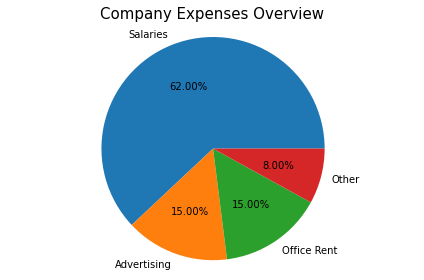

In [9]:
plt.clf()
plt.pie(grouped_data.Proportion, labels = grouped_data.index ,normalize = True, autopct='%.2f%%')
plt.axis('Equal')
plt.title('Company Expenses Overview', size=15)
plt.tight_layout()
plt.show()

## Producivity & Salaries Analisys

In [10]:
employees = pd.read_csv('/Users/matteoamanti/Desktop/Github/ORACOLO23-CODECADEMY-GIT/Projects/Startup Transformation /employees.csv')
employees

,Name,Salary,Productivity,Commute Time
0,Mason Pender,87902,29.91,16.79
1,Mia Rew,95672,49.91,44.48
2,Jalisa Kroenke,177864,78.00,19.40
3,Krystal Homeyer,186643,24.36,42.06
4,Kiana Wishart,167148,4.08,25.58
...,...,...,...,...
295,Delmy Conatser,55465,52.61,54.34
296,Thomas Sams,160453,12.15,58.05
297,Lisabeth Naslund,164297,85.84,38.18
298,Devorah Hooser,148398,76.27,12.16


In [11]:
sorted_productivity = employees.sort_values('Productivity').reset_index(drop=True)

worst100 = sorted_productivity[:99]
worst100

,Name,Salary,Productivity,Commute Time
0,Wilber Rye,111647,0.06,49.42
1,Fredric Gandee,154469,0.24,22.48
2,Johnson Fordham,168684,1.46,22.39
3,Lilia Lemoine,167579,1.67,27.36
4,Hilma Laughton,85506,1.79,36.41
...,...,...,...,...
94,Gena Dinh,150658,34.09,43.71
95,Bernardo Klingenberg,55464,34.52,32.27
96,Ashleigh Istre,178627,34.70,38.67
97,Penni Kimbrough,142680,35.21,49.64


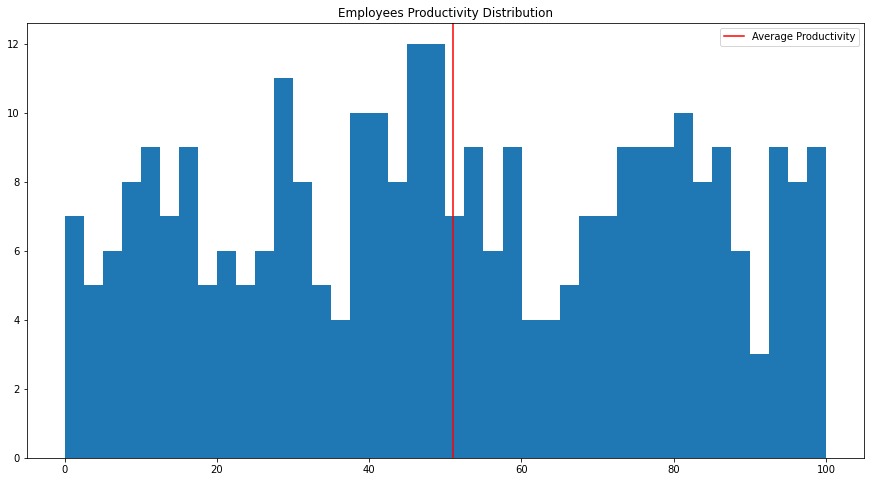

In [12]:
productivity = employees.Productivity
plt.figure(figsize=(15,8))
plt.hist(productivity, bins=40)
plt.axvline(productivity.mean(), color = 'r', label = 'Average Productivity')
plt.title('Employees Productivity Distribution')
plt.legend()
plt.show()


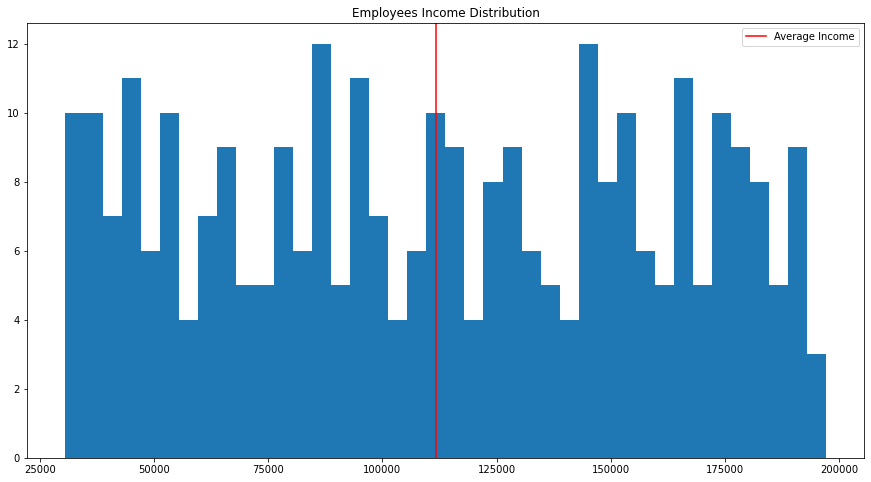

In [13]:
salaries = employees.Salary
plt.figure(figsize=(15,8))
plt.hist(salaries, bins=40)
plt.axvline(salaries.mean(), color = 'r', label = 'Average Income')
plt.title('Employees Income Distribution')
plt.legend()
plt.show()



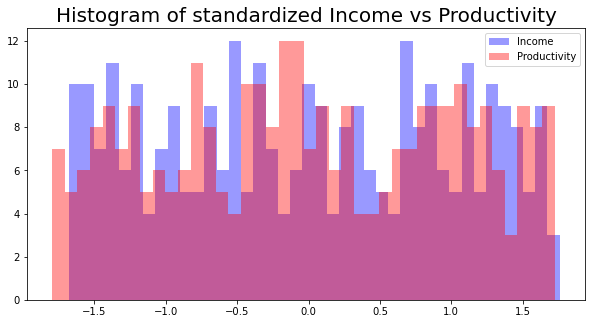

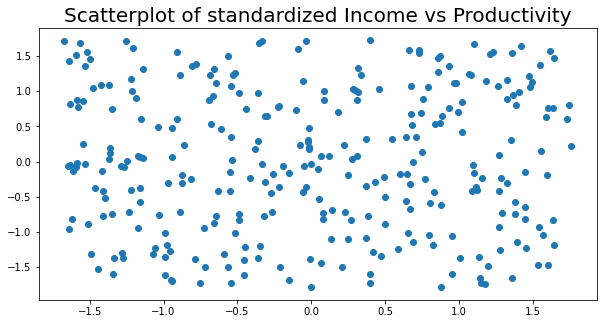

In [20]:
#Transforming series to arrays and reshape(error fix) them to transform data with standardization using 'sklearn StandardScaler'

from sklearn.preprocessing import StandardScaler

salaries_arr = np.array(salaries)
productivity_arr = np.array(productivity)

scaler = StandardScaler()

standardized_productivity = scaler.fit_transform(productivity_arr.reshape(-1, 1))
standardized_salaries = scaler.fit_transform(salaries_arr.reshape(-1, 1))

# Histogram of standardized Income vs Productivity

plt.figure(figsize=(10,5))
plt.hist(standardized_salaries, bins=40, color = 'blue', alpha =0.4,label='Income')
plt.hist(standardized_productivity, bins=40,color = 'red', alpha =0.4,label='Productivity')
plt.title('Histogram of standardized Income vs Productivity', size=20)

plt.legend()
plt.show()

# Scatterplot of standardized Income vs Productivity

plt.figure(figsize=(10,5))
plt.scatter(standardized_salaries, standardized_productivity)
plt.title('Scatterplot of standardized Income vs Productivity', size=20)
plt.show()


### Conclusion

There is not apparent correlation between Productivity and Income in our Employees dataset.

## Commute Time  Analisys

In [21]:
commute_time = employees['Commute Time']
employees['Commute Time'].describe()

count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64

In [22]:
commute_time 

0      16.79
1      44.48
2      19.40
3      42.06
4      25.58
       ...  
295    54.34
296    58.05
297    38.18
298    12.16
299    34.53
Name: Commute Time, Length: 300, dtype: float64

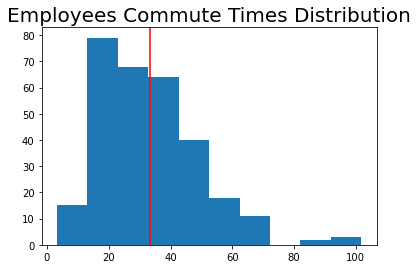

In [23]:
plt.hist(commute_time)
plt.title('Employees Commute Times Distribution', size=20)
plt.axvline(commute_time.mean(), color = 'r', label = 'Average Commute Time')
plt.show()

In [24]:
commute_time_log = np.log(commute_time)
commute_time_log

0      2.820783
1      3.795040
2      2.965273
3      3.739097
4      3.241811
         ...   
295    3.995261
296    4.061305
297    3.642312
298    2.498152
299    3.541829
Name: Commute Time, Length: 300, dtype: float64

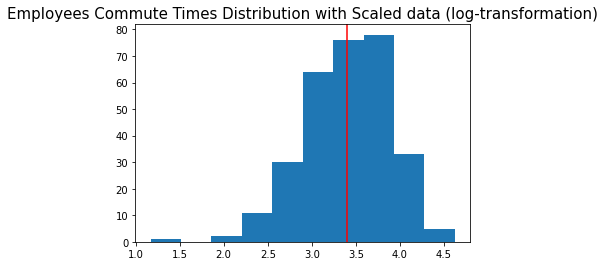

In [25]:
plt.hist(commute_time_log)
plt.title('Employees Commute Times Distribution with Scaled data (log-transformation)', size=15)
plt.axvline(commute_time_log.mean(), color = 'r', label = 'Average Commute Time')
plt.show()